In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr

In [3]:
df=pd.read_csv("pima-indians-diabetes-data.csv")

In [49]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


In [6]:
Q1 = df.quantile(0.25)  #25%
Q3 = df.quantile(0.75) #75%
IQR = Q3 - Q1        #50%

In [8]:
df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

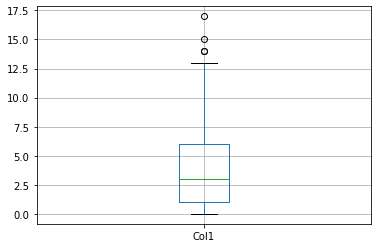

In [5]:
df.boxplot("Col1")

In [50]:
outliers=[]
def detect_outliers(a):
    threshold=3    #means 3rd standard deviation
    mean=np.mean(a)
    std=np.std(a)
    
    for i in a:
        z_score= (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [7]:
outlier_mpg= detect_outliers(df['Col1'])
outlier_mpg

[15, 17, 14, 14]

In [8]:
df[df['Col1'].isin([15,17,14])]

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [9]:
df["Col1"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [10]:
df["Col1"].max()

17

In [11]:
df["Col1"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Col1, dtype: int64

In [12]:
df.rename(columns= {"Col1": "Pregnancies","Col2":"Glucose","Col3":"BloodPressure","Col4":"SkinThickness","Col5":"Insulin","Col6":"BMI","Col7":"Diabetes pedigree function","Col8":"Age","Target":"Outcome"}, inplace=True)

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df[df['Pregnancies'].isin([15,17,14])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [15]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
np.round(df.corr(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
Diabetes pedigree function,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [17]:
#checking some relations of outliers related to other features 
#Assumptions : as bloodpressure, diabetesPF contributes less corr with others we can drop them too

## 1) as pregnancies have 54% positive corr with age , first analyze age

In [19]:
df["Age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [20]:
df.Age.min()

21

In [21]:
df.Age.max()

81

<AxesSubplot:>

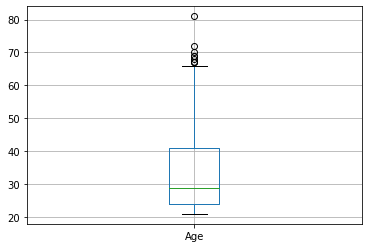

In [22]:
df.boxplot("Age")

In [25]:
outlier_age= detect_outliers(df['Age'])
outlier_age

[69, 72, 81, 70, 69]

In [26]:
df[df['Age'].isin([69,72,81,70,69])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
666,4,145,82,18,0,32.5,0.235,70,1
684,5,136,82,0,0,0.0,0.640,69,0


In [27]:
#replacing 0 values
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [28]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [29]:
df['BloodPressure'].median()

72.0

In [30]:
df['BloodPressure'].mean()

69.10546875

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Diabetes pedigree function'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

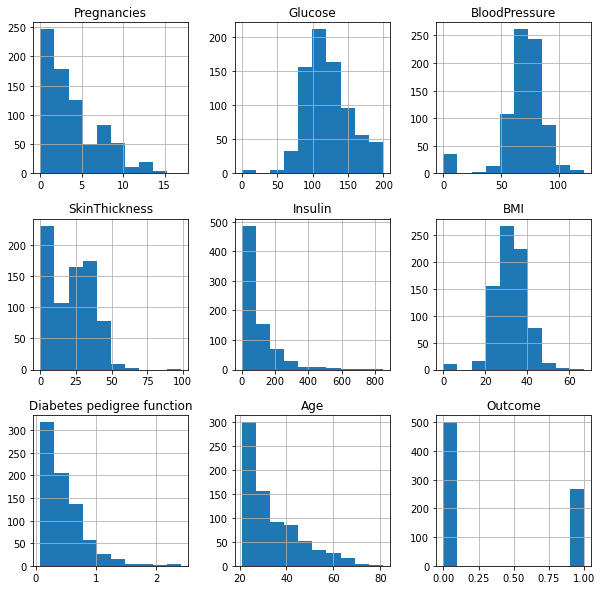

In [31]:
df.hist(bins=10,figsize=(10,10))

In [ ]:
#Blood pressure - a normal distribution, so we can use here mean

In [32]:
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())

In [33]:
print(df[df['BloodPressure']==0].shape[0])

0


In [ ]:
#Glucose - a normal distribution, so we can use here mean

In [34]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [ ]:
#skinthickness- skewed distribution, so we use median here

In [35]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())

In [ ]:
#with insulin and bmi

In [36]:
df["BMI"].mean()

31.992578124999977

In [37]:
df["BMI"].median()

32.0

In [38]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [39]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Diabetes pedigree function', 'Age', 'Outcome'],
      dtype='object')

In [40]:
from sklearn.preprocessing import QuantileTransformer
x=df
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =df.columns
df_new.head()

C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


<AxesSubplot:>

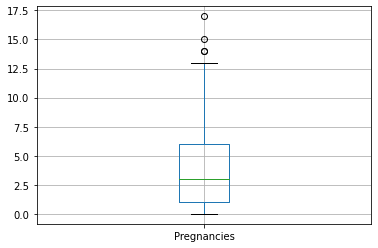

In [41]:
df.boxplot("Pregnancies")

<AxesSubplot:>

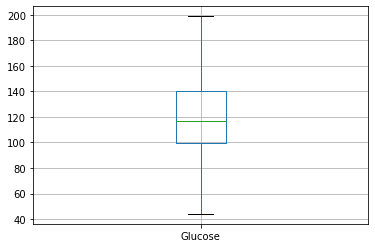

In [42]:
df.boxplot("Glucose")

<AxesSubplot:>

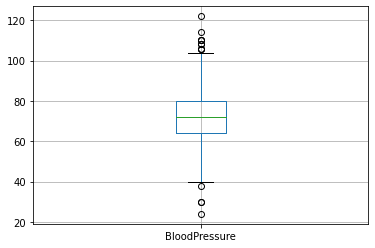

In [43]:
df.boxplot("BloodPressure")

<AxesSubplot:>

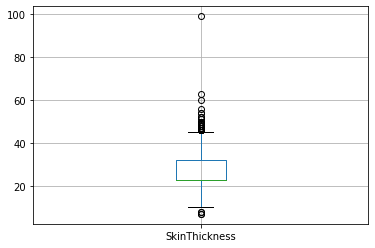

In [44]:
df.boxplot("SkinThickness")

In [45]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is

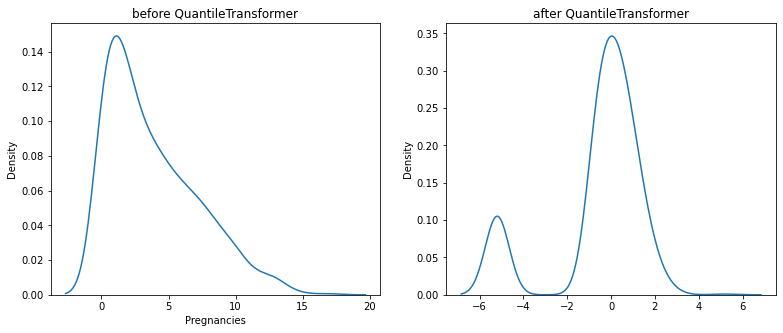

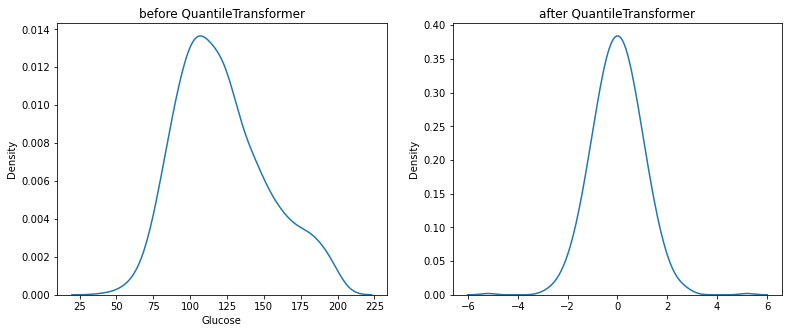

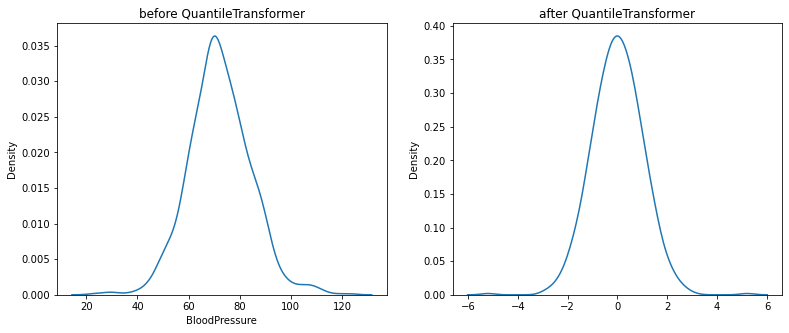

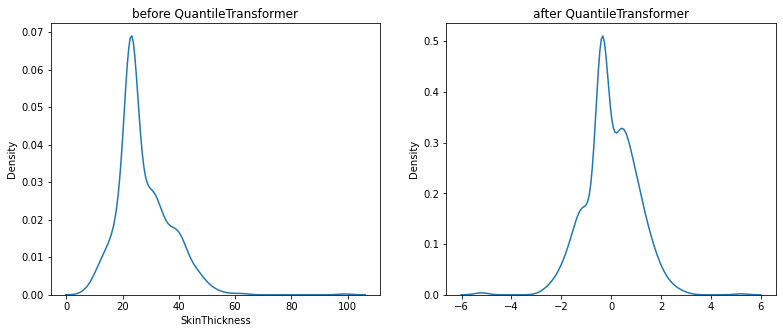

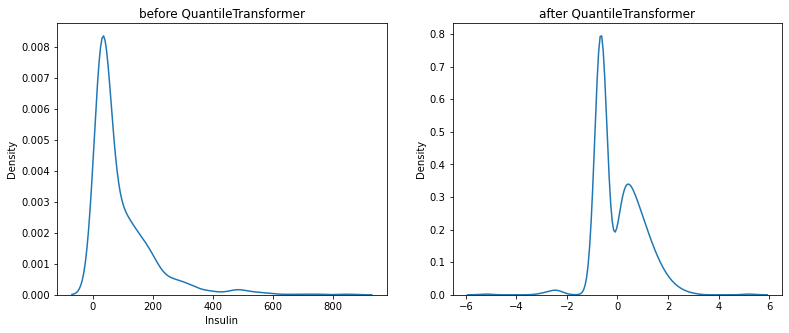

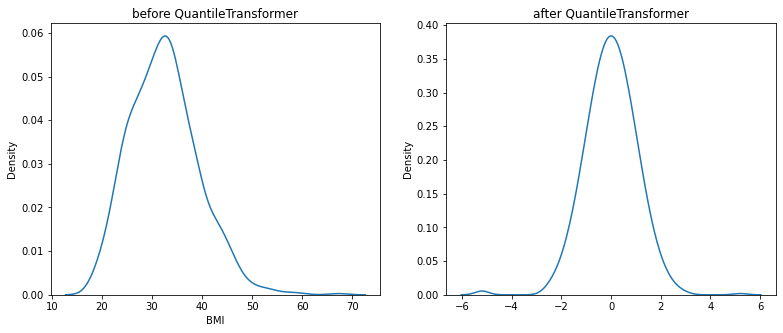

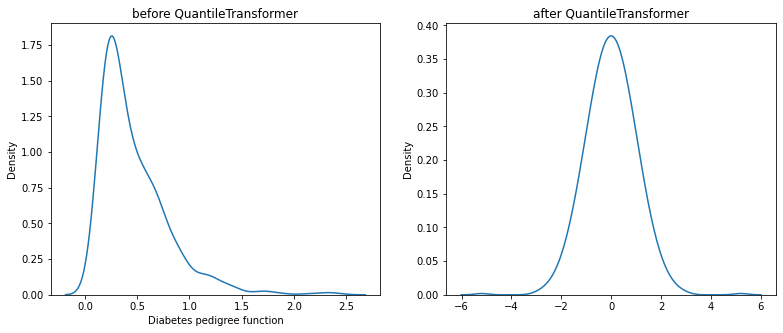

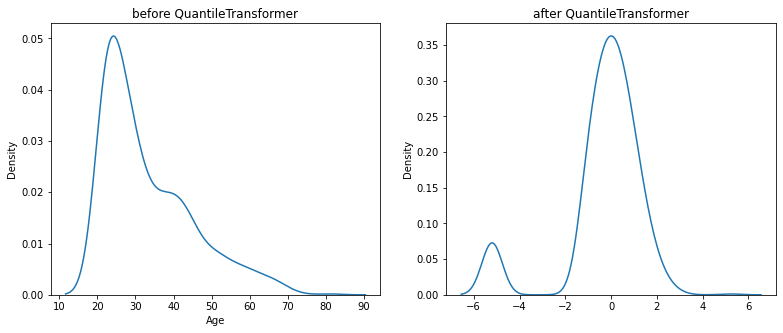

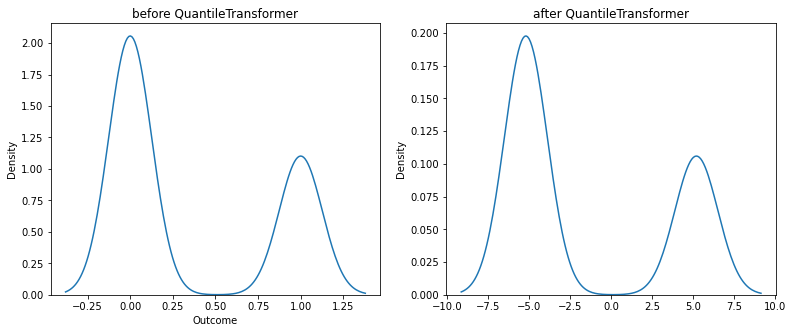

In [46]:
for col in df.columns:
    plots(df, col, QuantileTransformer(output_distribution='normal'))

In [53]:
outliers_skin= detect_outliers(df["SkinThickness"])

In [54]:
outliers_skin

[60, 56, 63, 99]

In [55]:
df[df["SkinThickness"].isin([60,56,63,99])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
57,0,100.0,88.0,60,110.0,46.8,0.962,31,0
120,0,162.0,76.0,56,100.0,53.2,0.759,25,1
445,0,180.0,78.0,63,14.0,59.4,2.420,25,1
579,2,197.0,70.0,99,30.5,34.7,0.575,62,1


# using IQr

In [57]:
df=np.sort(df["SkinThickness"])

In [59]:
df

array([ 7,  7,  8,  8, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23

In [62]:
iqr_value = iqr(df)

In [63]:
print("Interquartile Range (IQR):", iqr_value)

Interquartile Range (IQR): 9.0


In [ ]:
lower_fence= 